# RNN

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
x = np.linspace(0,100, 1001)
x

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [ ]:
# 소수점 첫째자리를 기준으로 반올림 해준다. 데이터 가공상 문제가 생김
x = np.round(x,1)
x

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [ ]:
y = np.sin(x)

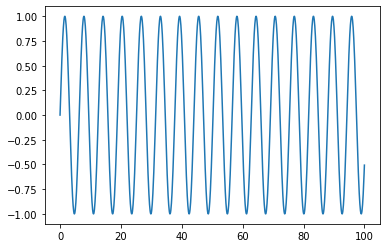

In [ ]:
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data = y, index = x, columns=["sine_wave"])
df

,sine_wave
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
99.6,-0.802196
99.7,-0.738582
99.8,-0.667588
99.9,-0.589924


In [ ]:
train = df.iloc[:801]
test = df.iloc[801:]

In [ ]:
train.shape, test.shape

((801, 1), (200, 1))

In [ ]:
train

,sine_wave
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
79.6,-0.872445
79.7,-0.916876
79.8,-0.952146
79.9,-0.977903


In [ ]:
# Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# MinMaxScaler : 0 ~ 1 사이로 정규화함

In [ ]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
s_train = scaler.transform(train)
s_train.shape

(801, 1)

In [ ]:
s_test = scaler.transform(test)

In [ ]:
# time series Generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 50 # 길어질수록 학습의 정확도는 높아짐
generator = TimeseriesGenerator(s_train, s_train, length=length, batch_size = 1)
g_test = TimeseriesGenerator(s_test, s_test, length=length, batch_size = 1)
# stride: 연속되는 출력 시퀀스 사이의 기간. 보폭이 s이면, 연속되는 출력 샘플은 data[i]를 중심으로, data[i+s], data[i+2*s] 등이 됩니다.
# batch_size: 각 배치의 (마지막을 제외한) 시간 단계 샘플의 수.
# length = 50 : 50번째 값을 예측함

In [ ]:
s_train[:51]

array([[4.99998429e-01],
       [5.49915469e-01],
       [5.99333755e-01],
       [6.47759515e-01],
       [6.94708895e-01],
       [7.39712793e-01],
       [7.82321544e-01],
       [8.22109415e-01],
       [8.58678860e-01],
       [8.91664489e-01],
       [9.20736720e-01],
       [9.45605073e-01],
       [9.66021072e-01],
       [9.81780726e-01],
       [9.92726571e-01],
       [9.98749240e-01],
       [9.99788555e-01],
       [9.95834132e-01],
       [9.86925483e-01],
       [9.73151620e-01],
       [9.54650167e-01],
       [9.31605983e-01],
       [9.04249320e-01],
       [8.72853515e-01],
       [8.37732266e-01],
       [7.99236491e-01],
       [7.57750829e-01],
       [7.13689791e-01],
       [6.67493618e-01],
       [6.19623889e-01],
       [5.70558902e-01],
       [5.20788899e-01],
       [4.70811163e-01],
       [4.21125057e-01],
       [3.72227028e-01],
       [3.24605649e-01],
       [2.78736736e-01],
       [2.35078596e-01],
       [1.94067449e-01],
       [1.56113062e-01],


In [ ]:
generator[0]

(array([[[4.99998429e-01],
         [5.49915469e-01],
         [5.99333755e-01],
         [6.47759515e-01],
         [6.94708895e-01],
         [7.39712793e-01],
         [7.82321544e-01],
         [8.22109415e-01],
         [8.58678860e-01],
         [8.91664489e-01],
         [9.20736720e-01],
         [9.45605073e-01],
         [9.66021072e-01],
         [9.81780726e-01],
         [9.92726571e-01],
         [9.98749240e-01],
         [9.99788555e-01],
         [9.95834132e-01],
         [9.86925483e-01],
         [9.73151620e-01],
         [9.54650167e-01],
         [9.31605983e-01],
         [9.04249320e-01],
         [8.72853515e-01],
         [8.37732266e-01],
         [7.99236491e-01],
         [7.57750829e-01],
         [7.13689791e-01],
         [6.67493618e-01],
         [6.19623889e-01],
         [5.70558902e-01],
         [5.20788899e-01],
         [4.70811163e-01],
         [4.21125057e-01],
         [3.72227028e-01],
         [3.24605649e-01],
         [2.78736736e-01],
 

In [ ]:
s_train[790:801]

array([[0.27794062],
       [0.23432576],
       [0.19336542],
       [0.15546886],
       [0.12101472],
       [0.09034726],
       [0.0637729 ],
       [0.04155716],
       [0.02392202],
       [0.01104367],
       [0.0030508 ]])

In [ ]:
generator[790]

(array([], dtype=float64), array([], dtype=float64))

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.SimpleRNN(50, input_shape=(50,1) ))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator, epochs=4)

Epoch 1/4
751/751 [==============================] - 21s 27ms/step - loss: 0.0126
Epoch 2/4
751/751 [==============================] - 21s 28ms/step - loss: 4.3292e-04
Epoch 3/4
751/751 [==============================] - 22s 29ms/step - loss: 1.4202e-04
Epoch 4/4
751/751 [==============================] - 22s 30ms/step - loss: 3.7546e-04


In [ ]:
p_test = model.predict(g_test)

In [ ]:
r_test = scaler.inverse_transform(p_test)
# .inverse_transfor : 정규화(0~1) 한 것을 다시 원상 복귀
print(r_test[0], r_test[50], r_test[148], r_test[149], r_test.shape)
test.iloc[50] # test.iloc[190:200]

[-0.2728483] [0.8624757] [-0.60827994] [-0.52371657] (150, 1)


sine_wave   -0.27347
Name: 85.1, dtype: float64

In [ ]:
# 마지막 예측(100.1) 제거 # 필요없음
# pre_test = np.delete(r_test, -1)
# pre_test.shape

In [ ]:
# pit 1
test2 = test.drop(test.index[0:length])
test2

,sine_wave
85.1,-0.273470
85.2,-0.368131
85.3,-0.459115
85.4,-0.545511
85.5,-0.626456
...,...
99.6,-0.802196
99.7,-0.738582
99.8,-0.667588
99.9,-0.589924


In [ ]:
test2['predict_test_sine'] = r_test
test2

,sine_wave,predict_test_sine
85.1,-0.273470,-0.272848
85.2,-0.368131,-0.370773
85.3,-0.459115,-0.463974
85.4,-0.545511,-0.551412
85.5,-0.626456,-0.632247
...,...,...
99.6,-0.802196,-0.819553
99.7,-0.738582,-0.757040
99.8,-0.667588,-0.686356
99.9,-0.589924,-0.608280


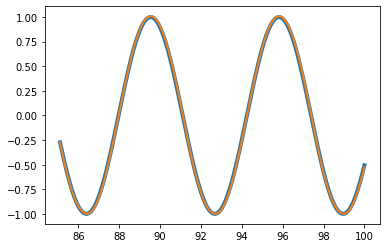

In [ ]:
plt.plot(test2.index, test2.sine_wave, linewidth = 4.0)
plt.plot(test2.index, test2.predict_test_sine, linewidth = 2.0)

In [ ]:
# plt 2
x2_test = x[851:]

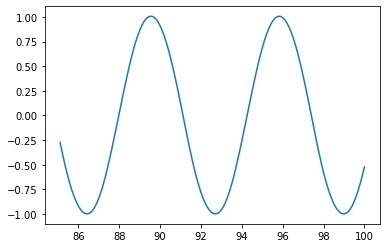

In [ ]:
plt.plot(x2_test, r_test)

In [ ]:
# 100.1, 100.2, 100.3, ...
g_test[0][0].shape, s_test.shape

((1, 50, 1), (200, 1))

In [ ]:
batch = s_test[-length:]
batch.shape

(50, 1)

In [ ]:
forecast = []
c_batch = batch.reshape((1, length, 1))
num=200

for i in range(num):
  c_predict = model.predict(c_batch)[0]
  #print(c_predict)
  forecast.append(c_predict)
  c_batch = np.append(c_batch[:,1:,:], [[c_predict]], axis=1)
 # print(c_batch[0][i])
# np.append() : arr의 끝에 values(배열)을 추가합니다. axis로 배열이 추가되는 방향을 지정할 수 있음

In [ ]:
forecast = scaler.inverse_transform(forecast)
forecast[:10]

array([[-0.43366575],
       [-0.33505934],
       [-0.2459523 ],
       [-0.13987325],
       [-0.05749082],
       [ 0.04814883],
       [ 0.13401376],
       [ 0.24046981],
       [ 0.32645656],
       [ 0.42655284]])

In [ ]:
forecast_ind = np.arange(100.1, 120.0, 0.1)
forecast_ind.shape

(200,)

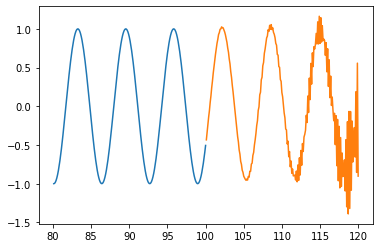

In [ ]:
plt.plot(test.index, test['sine_wave'])
plt.plot(forecast_ind, forecast)

In [ ]:
# 100.1, 100.2, 100.3, ...
# 잘 못함, 이렇게 예측하는 거 아님
x2 = np.linspace(0,500, 5001)
#print(x2)
x2 = np.round(x2,1)
#print(x2)
y2 = np.sin(x2)
df2 = pd.DataFrame(data = y2, index = x2, columns=["sine_wave"])
test_2 = df2.iloc[801:]
#print(test_2) 
s_test_2 = scaler.transform(test_2)
g_test_2 = TimeseriesGenerator(s_test_2, s_test_2, length=length, batch_size = 1)
#print(g_test_2[0]) 
p_test_2 = model.predict(g_test_2)
r_test_2 = scaler.inverse_transform(p_test_2)
#print(r_test_2.shape) 
test_3 = test_2.drop(test_2.index[0:length])
test_3['predict_test_sine'] = r_test_2
test_3

NameError: ignored

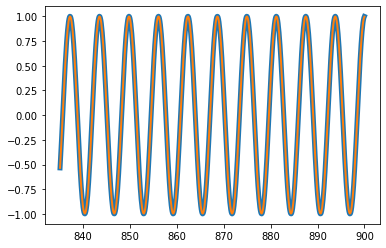

In [ ]:
plt.plot(test_3.index[500:], test_3.sine_wave.iloc[500:], linewidth = 5.0)
plt.plot(test_3.index[500:], test_3.predict_test_sine.iloc[500:], linewidth = 2.0)

---
# LSTM

In [ ]:
model_LSTM = tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(60, input_shape=(50,1) ))
# 계층을 늘리면 성능 향상이 된다고 한다.
model_LSTM.add(tf.keras.layers.Dense(1))

In [ ]:
model_LSTM.compile(optimizer='adam', loss='mse')

In [ ]:
model_LSTM.fit(generator, epochs=6)

Epoch 1/6
751/751 [==============================] - 3s 4ms/step - loss: 0.0067
Epoch 2/6
751/751 [==============================] - 3s 4ms/step - loss: 2.0086e-04
Epoch 3/6
751/751 [==============================] - 3s 4ms/step - loss: 2.9047e-04
Epoch 4/6
751/751 [==============================] - 3s 4ms/step - loss: 7.7942e-05
Epoch 5/6
751/751 [==============================] - 3s 4ms/step - loss: 5.9064e-04
Epoch 6/6
751/751 [==============================] - 3s 4ms/step - loss: 1.4502e-05


In [ ]:
forecast_LSTM = []
c_batch = batch.reshape((1, length, 1))

for i in range(200):
  c_predict = model_LSTM.predict(c_batch)[0]
  #print(c_predict)
  forecast_LSTM.append(c_predict)
  c_batch = np.append(c_batch[:,1:,:], [[c_predict]], axis=1)
  #print(c_batch[0][i])
# np.append() : arr의 끝에 values(배열)을 추가합니다. axis로 배열이 추가되는 방향을 지정할 수 있음

In [ ]:
forecast_LSTM = scaler.inverse_transform(forecast_LSTM)

In [2]:
plt.figure(figsize=(16,8))
plt.plot(test.index, test['sine_wave'])
plt.plot(forecast_ind, forecast,label='RNN')
plt.plot(forecast_ind, forecast_LSTM, label='LSTM')
plt.legend(loc='bast') 

#plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation='45')
# plt.title('서울 to 경기')
# plt.legend(labels=['LSTM'], loc='best')

NameError: ignored

In [ ]:
# 연습

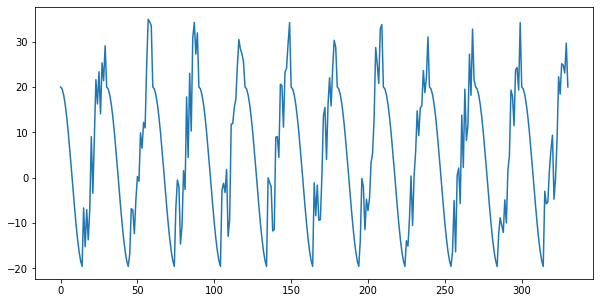

In [ ]:
# 데이터
np.random.seed(2020)

x = np.arange(30 * 12 + 1)
month_time = (x % 30) / 30
y = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))

plt.figure(figsize = (10, 5)) 
plt.plot(np.arange(0, 30 * 11 + 1), y[:30 * 11 + 1])

In [ ]:
# 전처리
df = pd.DataFrame(data = y, index = x, columns=["Y-Line"])
df

x_train = df.iloc[:-71]
x_test = df.iloc[-71:]
x.shape, x_train.shape, x_test.shape

((361,), (290, 1), (71, 1))

In [ ]:
df.shape

(361, 1)

In [ ]:
# Scale Data, 정규화 과정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# MinMaxScaler : 0 ~ 1 사이로 정규화함
scaler.fit(x_train)
s_train = scaler.transform(x_train)
s_test = scaler.transform(x_test)
s_train.shape, s_test.shape

((290, 1), (71, 1))

In [ ]:
# time series Generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 50 # 길어질수록 학습의 정확도는 높아짐
ts_train = TimeseriesGenerator(s_train, s_train, length=length, batch_size = 1)
ts_test = TimeseriesGenerator(s_test, s_test, length=length, batch_size = 1)
# stride: 연속되는 출력 시퀀스 사이의 기간. 보폭이 s이면, 연속되는 출력 샘플은 data[i]를 중심으로, data[i+s], data[i+2*s] 등이 됩니다.
# batch_size: 각 배치의 (마지막을 제외한) 시간 단계 샘플의 수.
# length = 50 : 50번째 값을 예측함

In [ ]:
# lstm
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(60, input_shape=(50,1) ))
# 계층을 늘리면 성능 향상이 된다고 한다.
model_lstm.add(tf.keras.layers.Dense(1))

In [ ]:
# rnn
model_rnn = tf.keras.models.Sequential()
model_rnn.add(tf.keras.layers.SimpleRNN(60, input_shape=(50,1) ))
model_rnn.add(tf.keras.layers.Dense(1))

In [ ]:
model_lstm.compile(optimizer='adam', loss='mse')
model_rnn.compile(optimizer='adam', loss='mse')

In [ ]:
model_lstm.fit(ts_train, epochs=6)

Epoch 1/6
240/240 [==============================] - 1s 4ms/step - loss: 0.0421
Epoch 2/6
240/240 [==============================] - 1s 4ms/step - loss: 0.0127
Epoch 3/6
240/240 [==============================] - 1s 4ms/step - loss: 0.0125
Epoch 4/6
240/240 [==============================] - 1s 4ms/step - loss: 0.0127
Epoch 5/6
240/240 [==============================] - 1s 4ms/step - loss: 0.0123
Epoch 6/6
240/240 [==============================] - 1s 4ms/step - loss: 0.0115


In [ ]:
model_rnn.fit(ts_train, epochs=6)

Epoch 1/6
240/240 [==============================] - 7s 31ms/step - loss: 0.0255
Epoch 2/6
240/240 [==============================] - 7s 30ms/step - loss: 0.0163
Epoch 3/6
240/240 [==============================] - 7s 30ms/step - loss: 0.0126
Epoch 4/6
240/240 [==============================] - 7s 30ms/step - loss: 0.0139
Epoch 5/6
240/240 [==============================] - 7s 30ms/step - loss: 0.0145
Epoch 6/6
240/240 [==============================] - 7s 30ms/step - loss: 0.0129


In [ ]:
# 예측 테스트
p_test_lstm = model_lstm.predict(ts_test)
p_test_rnn = model_rnn.predict(ts_test)
ts_test[0][0].shape, p_test_lstm.shape, ts_test[0][0].shape, p_test_rnn.shape

((1, 50, 1), (21, 1), (1, 50, 1), (21, 1))

In [ ]:
# 정규화 원상복귀
r_test_lstm = scaler.inverse_transform(p_test_lstm)
r_test_rnn = scaler.inverse_transform(p_test_rnn)
# .inverse_transfor : 정규화(0~1) 한 것을 다시 원상 복귀

In [ ]:
# x_test 크기 맞추고, 합치기
cut_x_tst = x_test.drop(x_test.index[0:length])
cut_x_tst['lstm'] = r_test_lstm
cut_x_tst['rnn'] = r_test_rnn
cut_x_tst

,Y-Line,lstm,rnn
340,-10.000000,-8.714374,-7.571621
341,-13.382612,-11.106855,-9.344727
342,-16.180340,-12.991881,-12.176374
343,-18.270909,-14.299097,-14.705523
344,-19.562952,-14.997905,-16.086555
345,-15.588665,-15.070565,-15.756349
346,-4.701384,-13.719797,-13.344872
347,-16.467666,-9.807160,-8.070210
348,-8.394426,-7.917924,-11.523505
349,-13.241514,-4.567052,-7.256945


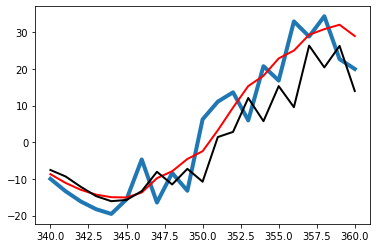

In [ ]:
# 시각화
plt.plot(cut_x_tst.index, cut_x_tst["Y-Line"], linewidth = 4.0)
plt.plot(cut_x_tst.index, cut_x_tst.lstm,color='red', linewidth = 2.0)
plt.plot(cut_x_tst.index, cut_x_tst.rnn, color='black', linewidth = 2.0)

In [ ]:
# 미래 예측
batch = s_test[-length:]

forecast_LSTM = []
forecast_RNN = []
c_batch_lstm = batch.reshape((1, length, 1))
c_batch_rnn = batch.reshape((1, length, 1))
num = 100

for i in range(num):
  c_predict_lstm = model_lstm.predict(c_batch_lstm)[0]
  c_predict_rnn = model_rnn.predict(c_batch_rnn)[0]
  forecast_LSTM.append(c_predict_lstm)
  forecast_RNN.append(c_predict_rnn)
  c_batch_lstm = np.append(c_batch_lstm[:,1:,:], [[c_predict_lstm]], axis=1)
  c_batch_rnn = np.append(c_batch_rnn[:,1:,:], [[c_predict_rnn]], axis=1)
# np.append() : arr의 끝에 values(배열)을 추가합니다. axis로 배열이 추가되는 방향을 지정할 수 있음

In [ ]:
# 정규화 되돌리기
forecast_lstm = scaler.inverse_transform(forecast_LSTM)
forecast_rnn = scaler.inverse_transform(forecast_RNN)
forecast_lstm.shape

(100, 1)

In [ ]:
# shape 맞추기
forecast_ind = np.arange(360, 360+num )

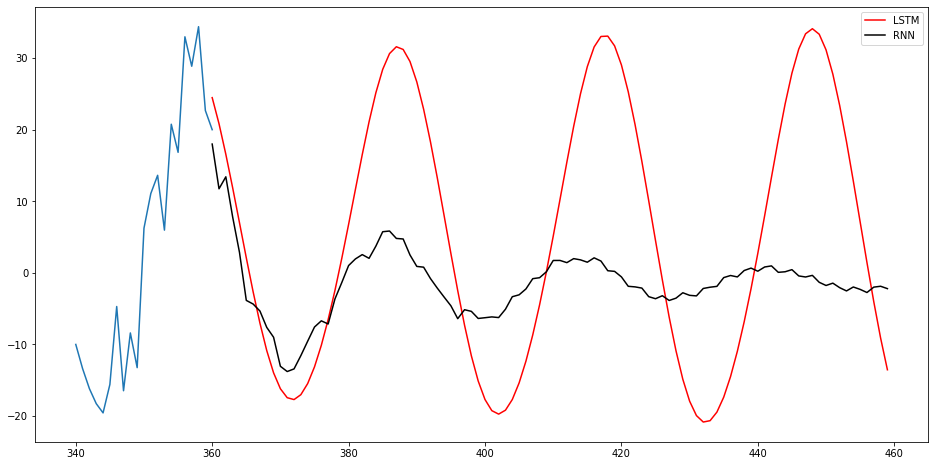

In [ ]:
# 시각화
plt.figure(figsize=(16,8))
plt.plot(cut_x_tst.index, cut_x_tst["Y-Line"])
plt.plot(forecast_ind, forecast_lstm, color='red', label='LSTM')
plt.plot(forecast_ind, forecast_rnn, color='black', label='RNN')
plt.legend() 

---
# 연습 2